In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [53]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [54]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [55]:
matches.shape

(756, 18)

In [56]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [57]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [58]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [59]:
match_df = matches.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [60]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [61]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [62]:
teams = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers']

In [63]:
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils' , 'Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1']=match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [64]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [65]:
match_df.shape

(516, 20)

In [66]:
match_df = match_df[match_df['dl_applied']==0]

In [67]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN,6,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,11345,IPL-2019,Bengaluru,04-05-2019,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,S Hetmyer,M. Chinnaswamy Stadium,Nigel Llong,Anil Chaudhary,Ulhas Gandhe,11345,179
750,11346,IPL-2019,Mohali,05-05-2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford,11346,172
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136


In [68]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [69]:
delivery_df = match_df.merge(delivery,on='match_id')

In [70]:
delivery_df = delivery_df[delivery_df['inning']==2]

In [71]:
delivery_df.shape

(58736, 24)

In [72]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [73]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121063,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
121064,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
121065,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
121066,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [74]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [75]:
delivery_df['balls_left']=126 - (delivery_df['over']*6 + delivery_df['ball'])

In [76]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121063,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
121064,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
121065,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
121066,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [77]:
delivery_df['player dismissed'] = delivery_df['player_dismissed'].fillna('0')
delivery_df['player dismissed'] = delivery_df['player dismissed'].apply(lambda x:x if x=='0' else '1')
delivery_df['player dismissed'] = delivery_df['player dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
display(delivery_df.head())

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,player dismissed,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,NaN,NaN,NaN,1,206,119,0,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,NaN,1,206,118,0,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,NaN,1,206,117,0,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,NaN,NaN,NaN,3,204,116,0,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,NaN,NaN,NaN,7,200,115,0,10


In [78]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,player dismissed,wickets
121063,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,NaN,NaN,NaN,152,0,4,0,5
121064,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,NaN,NaN,NaN,154,-2,3,0,5
121065,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,SR Watson,run out,KH Pandya,155,-3,2,1,4
121066,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,NaN,NaN,NaN,157,-5,1,0,4
121067,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,SN Thakur,lbw,NaN,157,-5,0,1,3


In [79]:
#crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score'])/(120 - delivery_df['balls_left'])

In [80]:
delivery_df['rrr'] = (delivery_df['runs_left'])/(delivery_df['balls_left'])

In [81]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,player dismissed,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,NaN,NaN,NaN,1,206,119,0,10,1.000000,1.731092
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,NaN,NaN,NaN,1,206,118,0,10,0.500000,1.745763
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,NaN,NaN,NaN,1,206,117,0,10,0.333333,1.760684
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,NaN,NaN,NaN,3,204,116,0,10,0.750000,1.758621
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,NaN,NaN,NaN,7,200,115,0,10,1.400000,1.739130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121063,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,NaN,NaN,NaN,152,0,4,0,5,1.310345,0.000000
121064,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,NaN,NaN,NaN,154,-2,3,0,5,1.316239,-0.666667
121065,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,SR Watson,run out,KH Pandya,155,-3,2,1,4,1.313559,-1.500000
121066,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,NaN,NaN,NaN,157,-5,1,0,4,1.319328,-5.000000


In [82]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [83]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [84]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [85]:
final_df = final_df.sample(final_df.shape[0])

In [86]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
43679,Kolkata Knight Riders,Rajasthan Royals,Kolkata,17,43,8,81,0.831169,0.395349,1


In [87]:
final_df.dropna(inplace=True)

In [88]:
final_df = final_df[final_df['balls_left']!=0]

In [89]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [90]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
99151,Kolkata Knight Riders,Sunrisers Hyderabad,Delhi,139,102,9,162,1.277778,1.362745
62809,Chennai Super Kings,Kolkata Knight Riders,Kolkata,64,49,6,119,0.774648,1.306122
118303,Rajasthan Royals,Kolkata Knight Riders,Kolkata,99,55,6,185,1.323077,1.800000
41732,Rajasthan Royals,Deccan Chargers,Hyderabad,99,80,9,137,0.950000,1.237500
114191,Kolkata Knight Riders,Rajasthan Royals,Jaipur,83,83,10,150,1.810811,1.000000
...,...,...,...,...,...,...,...,...,...
67615,Kings XI Punjab,Sunrisers Hyderabad,Chandigarh,87,44,6,150,0.828947,1.977273
68775,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,165,95,9,190,1.000000,1.736842
63957,Kolkata Knight Riders,Kings XI Punjab,Kolkata,133,103,8,149,0.941176,1.291262
55943,Mumbai Indians,Chennai Super Kings,Mumbai,135,90,9,173,1.266667,1.500000


In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(drop='first'),['batting_team','bowling_team','city'])]
,remainder='passthrough')

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [93]:
pipe = Pipeline(steps=[('step1',trf),('step2',LogisticRegression(solver='liblinear'))])

In [94]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [95]:
y_pred = pipe.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8020878267621431

In [97]:
def match_progression(x_df, match_id, pipe):
  match = x_df[x_df['match_id']==match_id]
  match = match[(match['ball'] == 6)]
  temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
  temp_df = temp_df[temp_df['balls_left']!=0]
  result = pipe.predict_proba(temp_df)
  temp_df['lose'] = np.round(result.T[0]*100,1)
  temp_df['win'] = np.round(result.T[1]*100,1)
  temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

  target = temp_df['total_runs_x'].values[0]
  runs = list(temp_df['runs_left'].values)
  new_runs = runs[:]
  runs.insert(0,target)
  temp_df['runs_after_over'] = np.array(runs[:-1]) - np.array(new_runs)
  wickets = list(temp_df['wickets'].values)
  new_wickets = wickets[:]
  new_wickets.insert(0,10)
  wickets.append(0)
  w = np.array(wickets)
  nw = np.array(new_wickets)
  temp_df['wickets_in_over'] = (nw-w)[0:temp_df.shape[0]]

  print('Target-' , target)
  temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
  return temp_df,target

In [98]:
temp_df,target = match_progression(delivery_df, 1, pipe)
temp_df

Target- 207


,end_of_over,runs_after_over,wickets_in_over,lose,win
130,1,11,0,87.9,12.1
136,2,1,0,90.7,9.3
142,3,16,0,82.8,17.2
148,4,11,0,76.9,23.1
155,5,5,0,76.8,23.2
162,6,10,1,82.9,17.1
168,7,7,1,89.4,10.6
174,8,13,0,83.9,16.1
180,9,10,0,79.3,20.7
187,10,10,0,73.9,26.1


Text(0.5, 1.0, 'Target-207')

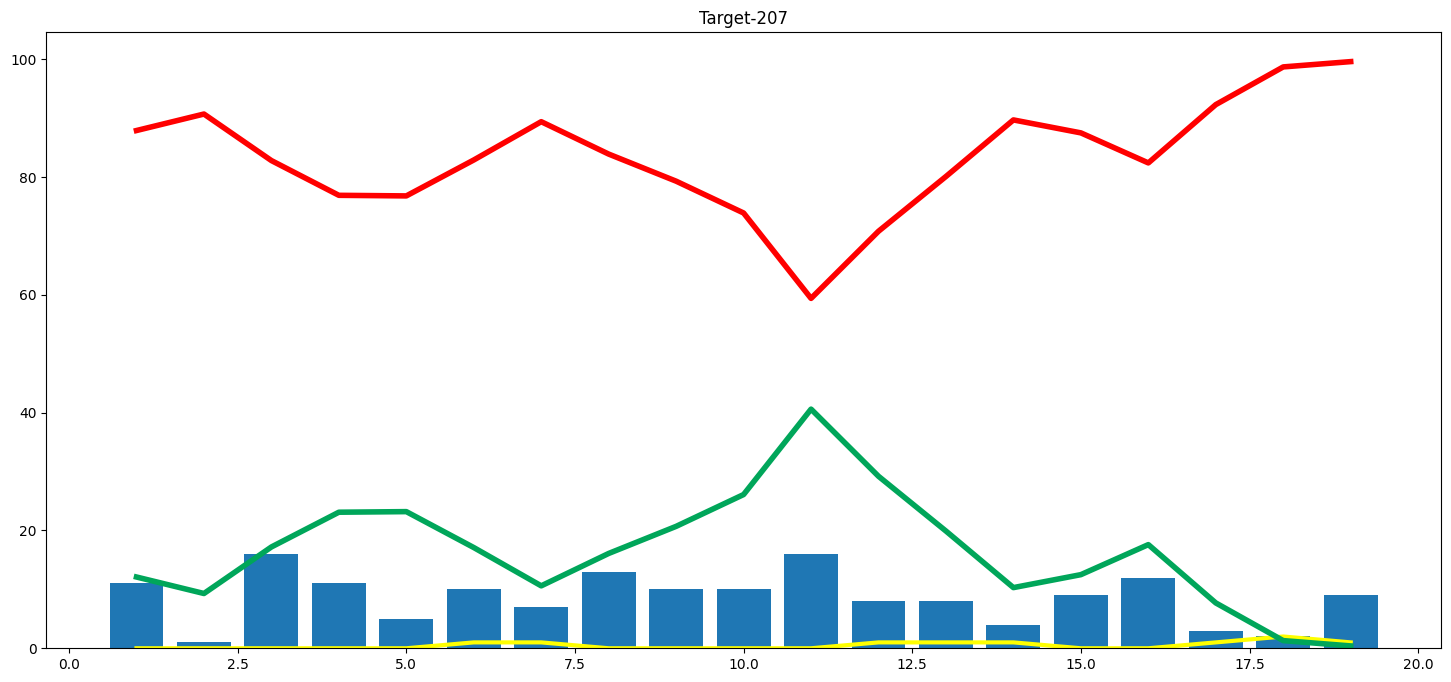

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [100]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Gujarat Lions',
 'Rising Pune Supergiant',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Delhi Daredevils',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Deccan Chargers']

In [101]:
delivery_df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Mumbai', 'Kolkata',
       'Bangalore', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Cuttack', 'Ahmedabad',
       'Nagpur', 'Dharamsala', 'Visakhapatnam', 'Ranchi', 'Delhi',
       'Abu Dhabi', nan, 'Sharjah', 'Bengaluru', 'Mohali'], dtype=object)

In [102]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))